# Decision Trees

About the Dataset
* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/home/redeus/Downloads/Telegram Desktop/DataScience/1. Introduction to Course/3.1 UNZIP_ME_FOR_NOTEBOOKS_V4/DATA/penguins_size.csv")

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## EDA

### Missing Data

In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [10]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Inspecting Each Categorical Data

In [11]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [13]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


## Looking for the most probable sex of the specie Gentoo according to Body Mass

In [15]:
df[df['species']=='Gentoo'].groupby('sex').describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [16]:
df.at[336, 'sex'] = 'FEMALE'

In [17]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

## Visualisation

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

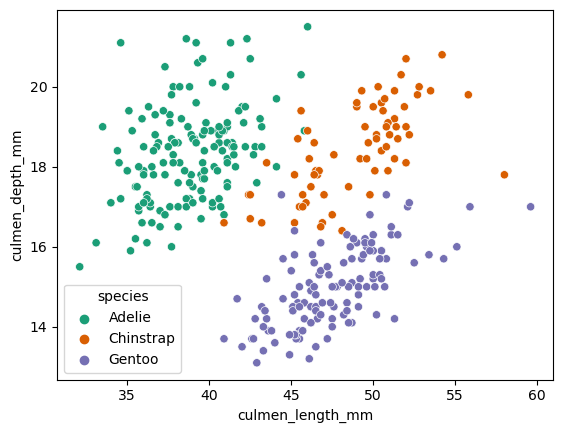

In [20]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

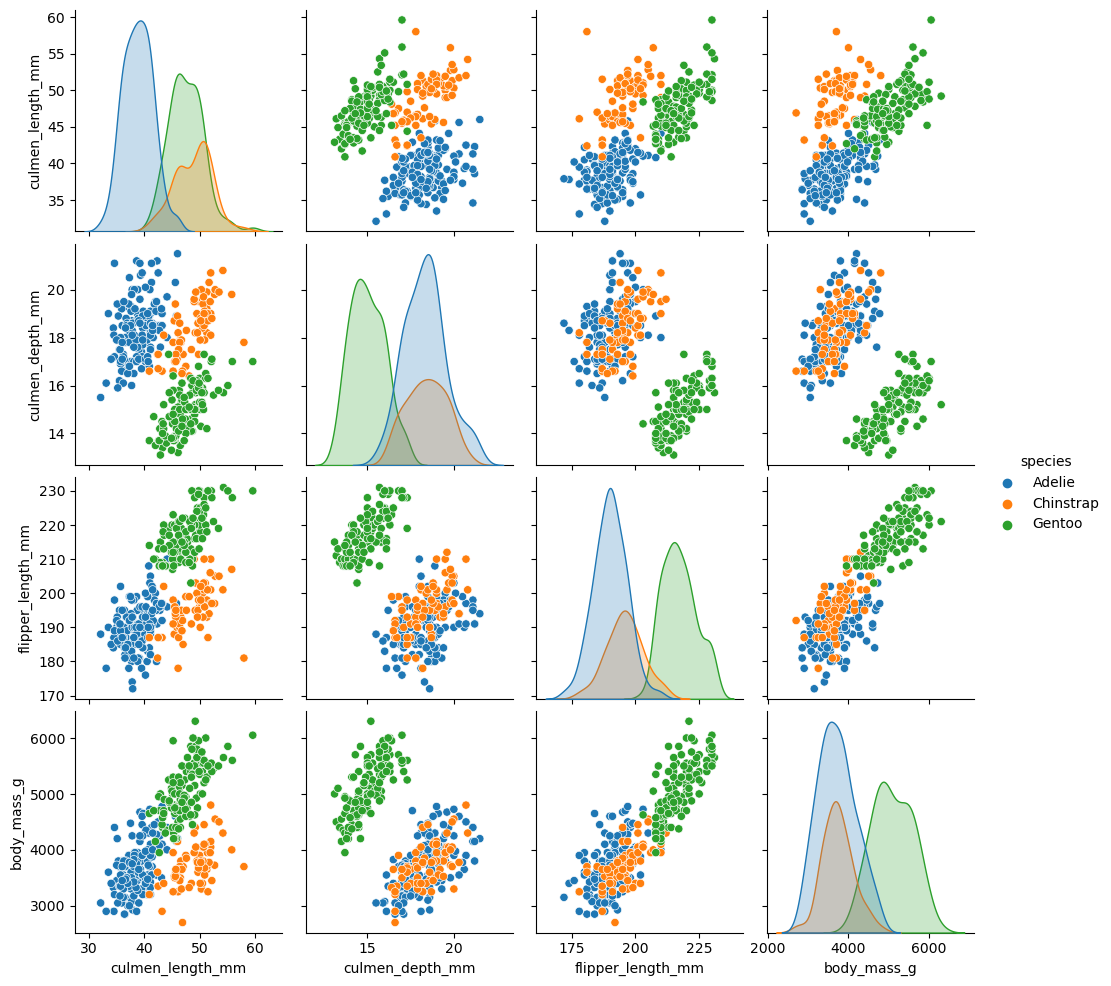

In [18]:
sns.pairplot(df, hue='species')

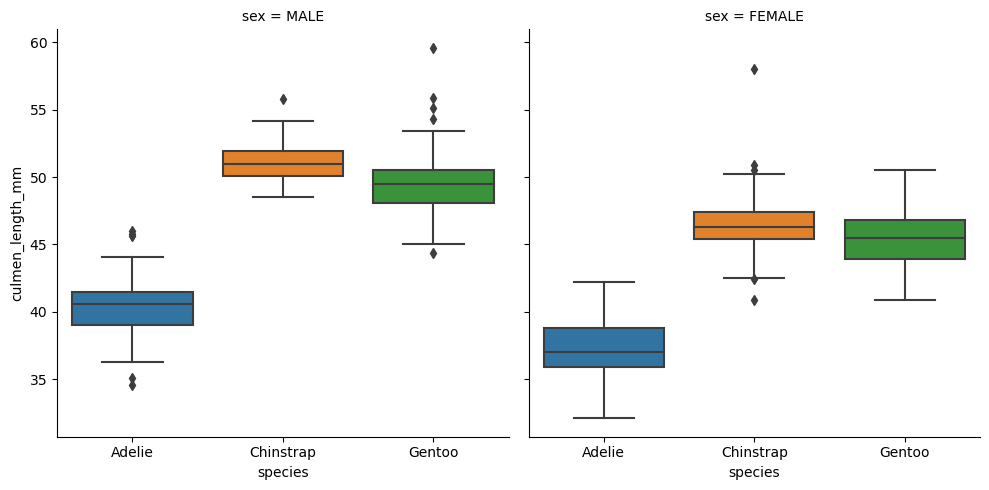

In [22]:
 sns.catplot(x='species', y='culmen_length_mm', data=df, kind='box', col='sex')

## Train | Test Split

In [50]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Tree Classifier

## Default Hyperparameters

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model = DecisionTreeClassifier()

In [55]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
base_preds = model.predict(X_test)

In [47]:
#y_test

## Evaluation

In [57]:
from sklearn.metrics import confusion_matrix,classification_report

In [65]:
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93        41
   Chinstrap       0.90      0.83      0.86        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.94      0.94       101



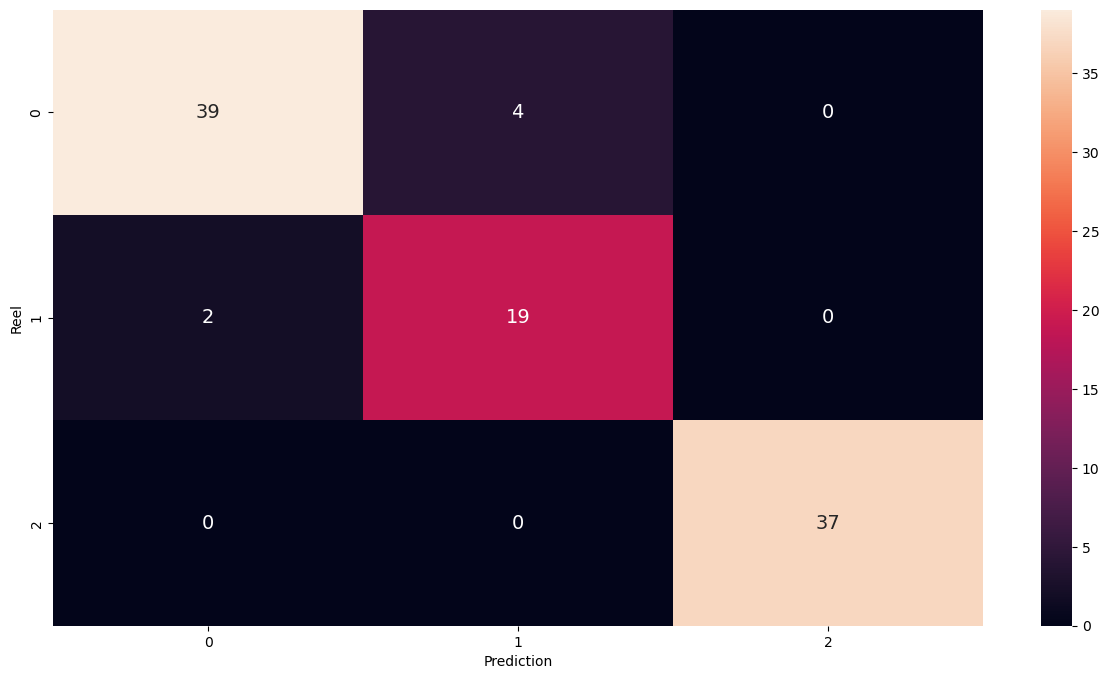

In [66]:
cm=confusion_matrix(base_preds, y_test)

plt.figure(figsize=[15, 8])
sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel('Prediction')
plt.ylabel('Reel')
plt.show()

In [67]:
model.feature_importances_

array([0.32352044, 0.04203954, 0.53120101, 0.01325074, 0.0681854 ,
       0.01017467, 0.0116282 ])

In [68]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [71]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, 
             columns=['Features Importance']).sort_values('Features Importance')

,Features Importance
island_Torgersen,0.010175
sex_MALE,0.011628
body_mass_g,0.013251
culmen_depth_mm,0.042040
island_Dream,0.068185
culmen_length_mm,0.323520
flipper_length_mm,0.531201


<Axes: xlabel='species', ylabel='body_mass_g'>

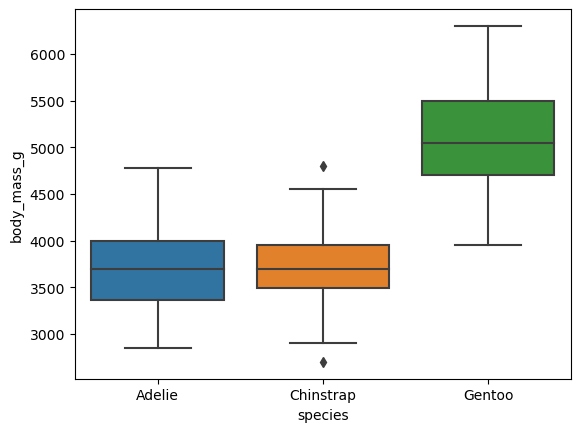

In [72]:
sns.boxplot(x='species', y='body_mass_g', data=df)

## Visualize the Tree

In [73]:
from sklearn.tree import plot_tree

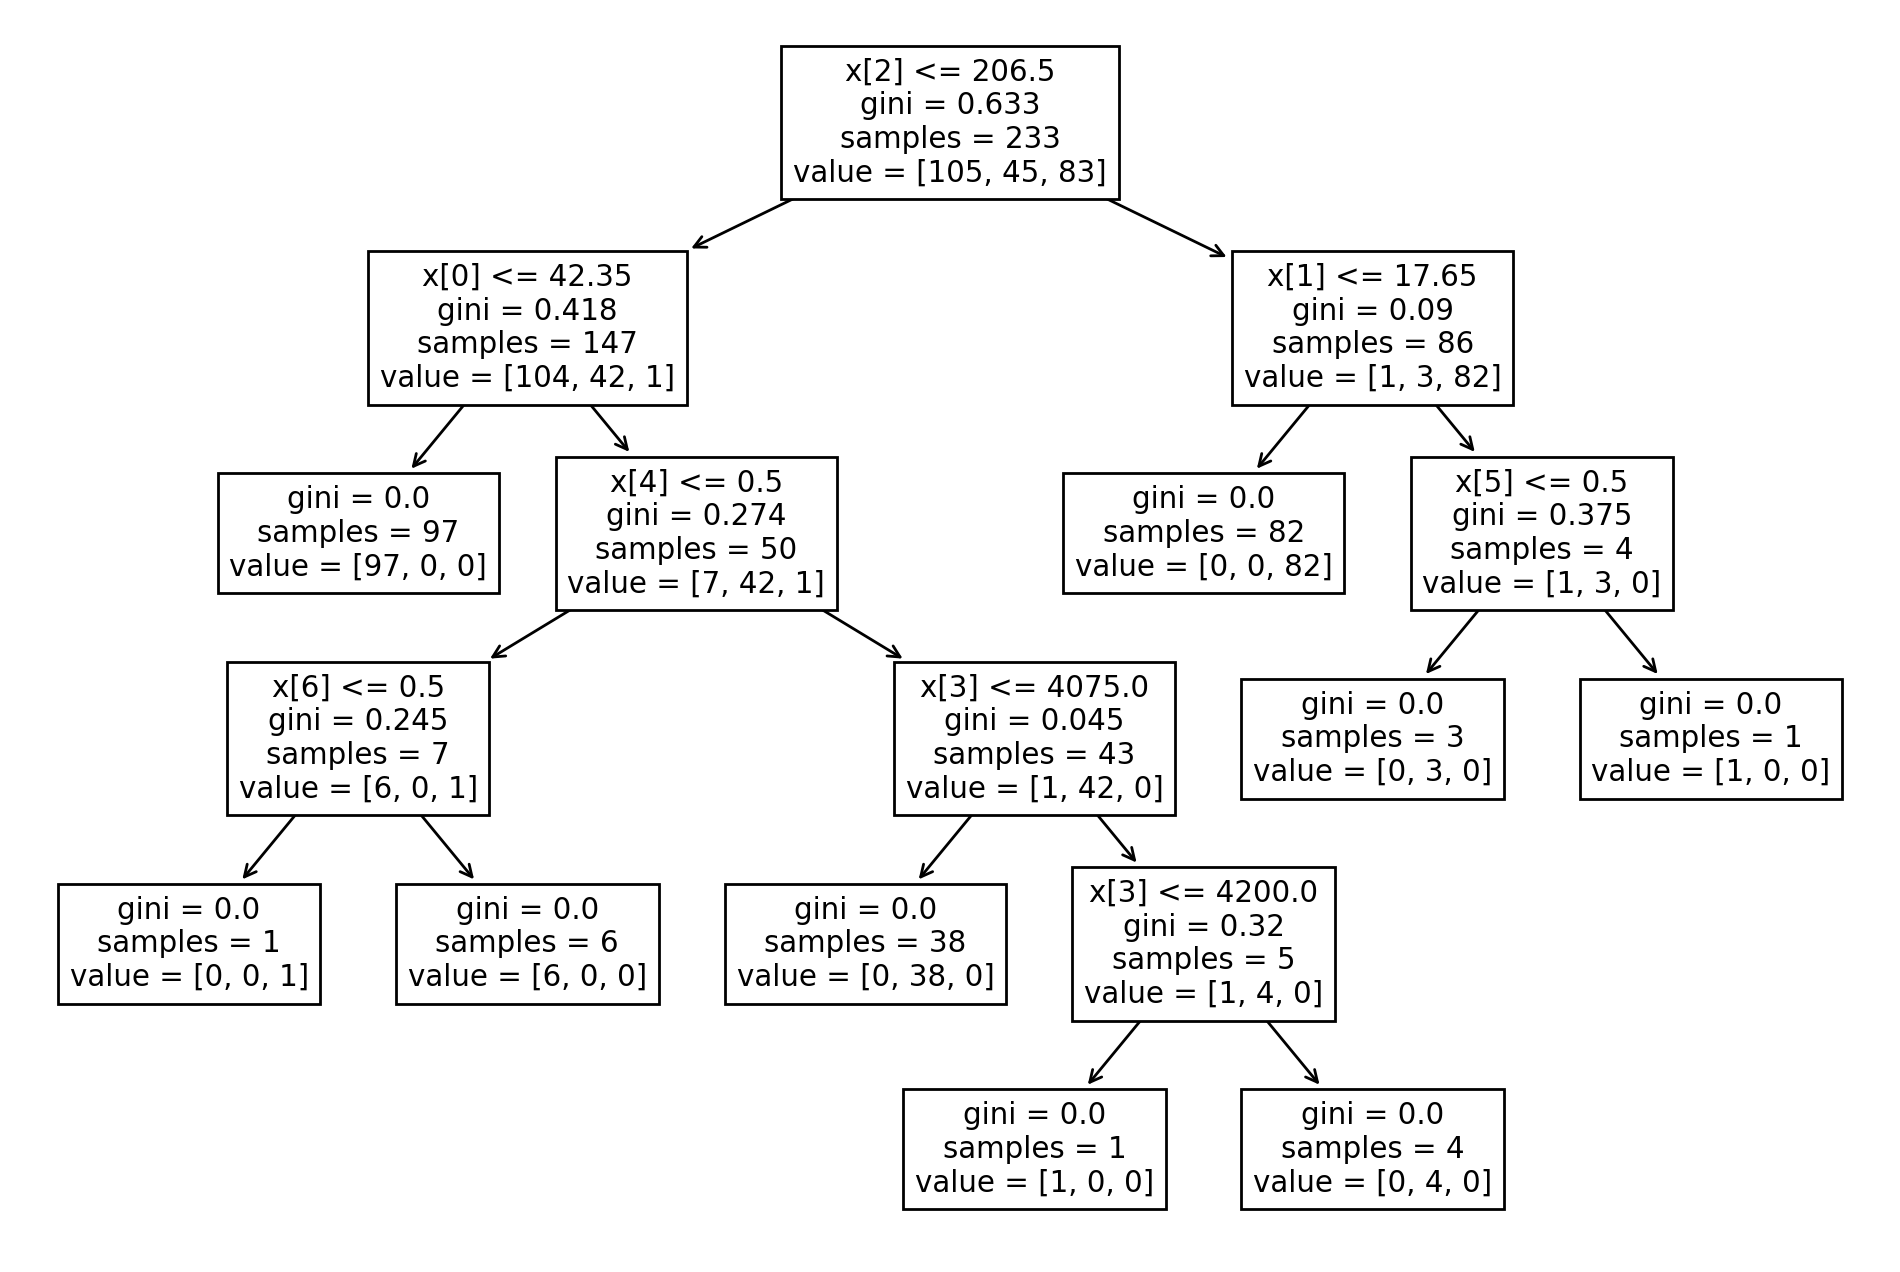

In [78]:
plt.figure(figsize=(12, 8), dpi=200)
plot_tree(model);

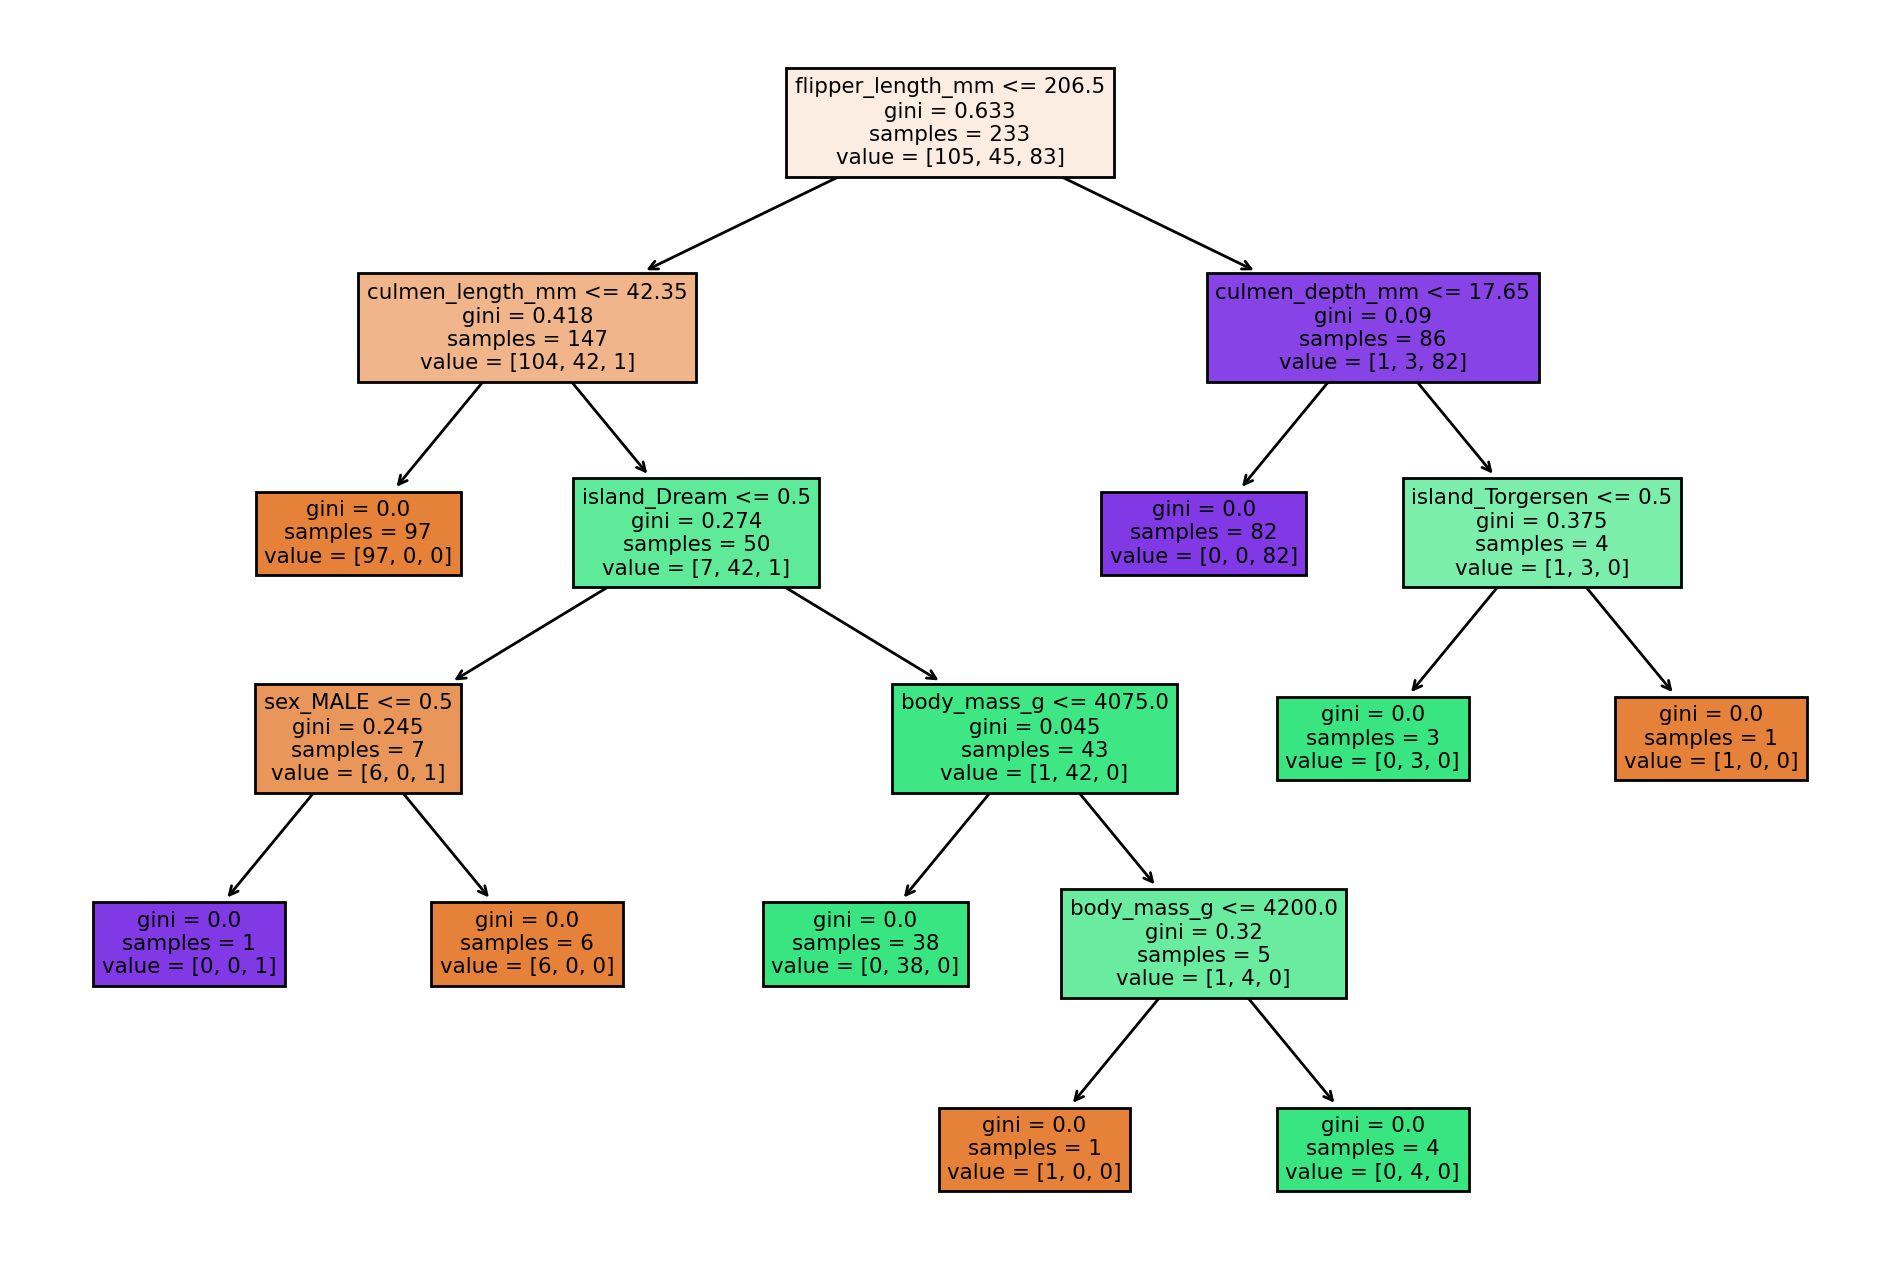

In [80]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model, feature_names=X.columns, filled=True);

In [81]:
len(X_train)

233

## Reporting Model Results

To begin experimenting with hyperparameters, let's create a function that reports back classification results and plots out the tree.

In [82]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=200)
    plot_tree(model, feature_names=X.columns, filled=True);

              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93        41
   Chinstrap       0.90      0.83      0.86        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.94      0.94       101





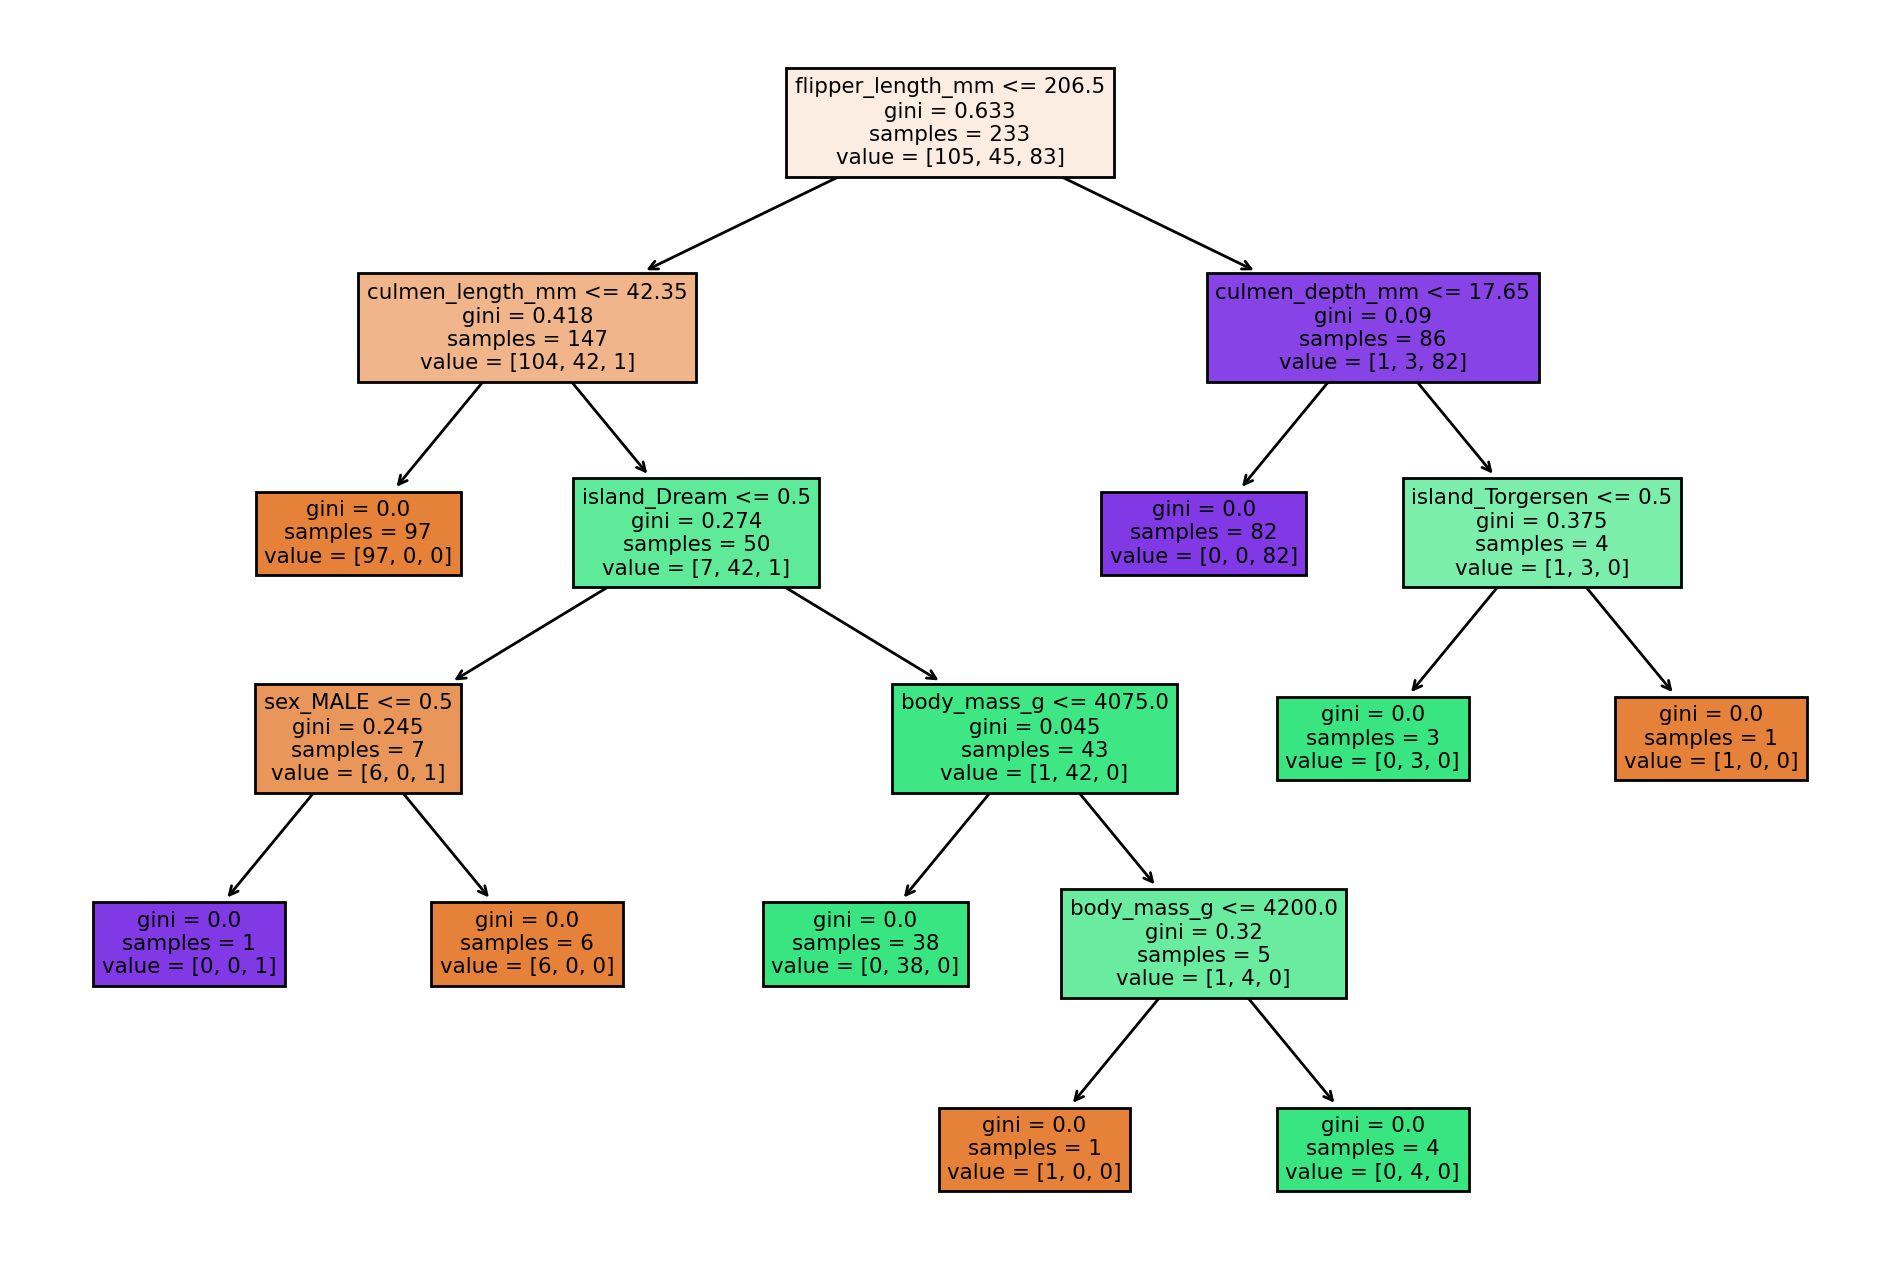

In [83]:
report_model(model)

## Setting a Maximum dept on the tree

In [84]:
pruned_tree = DecisionTreeClassifier(max_depth=2)

In [85]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





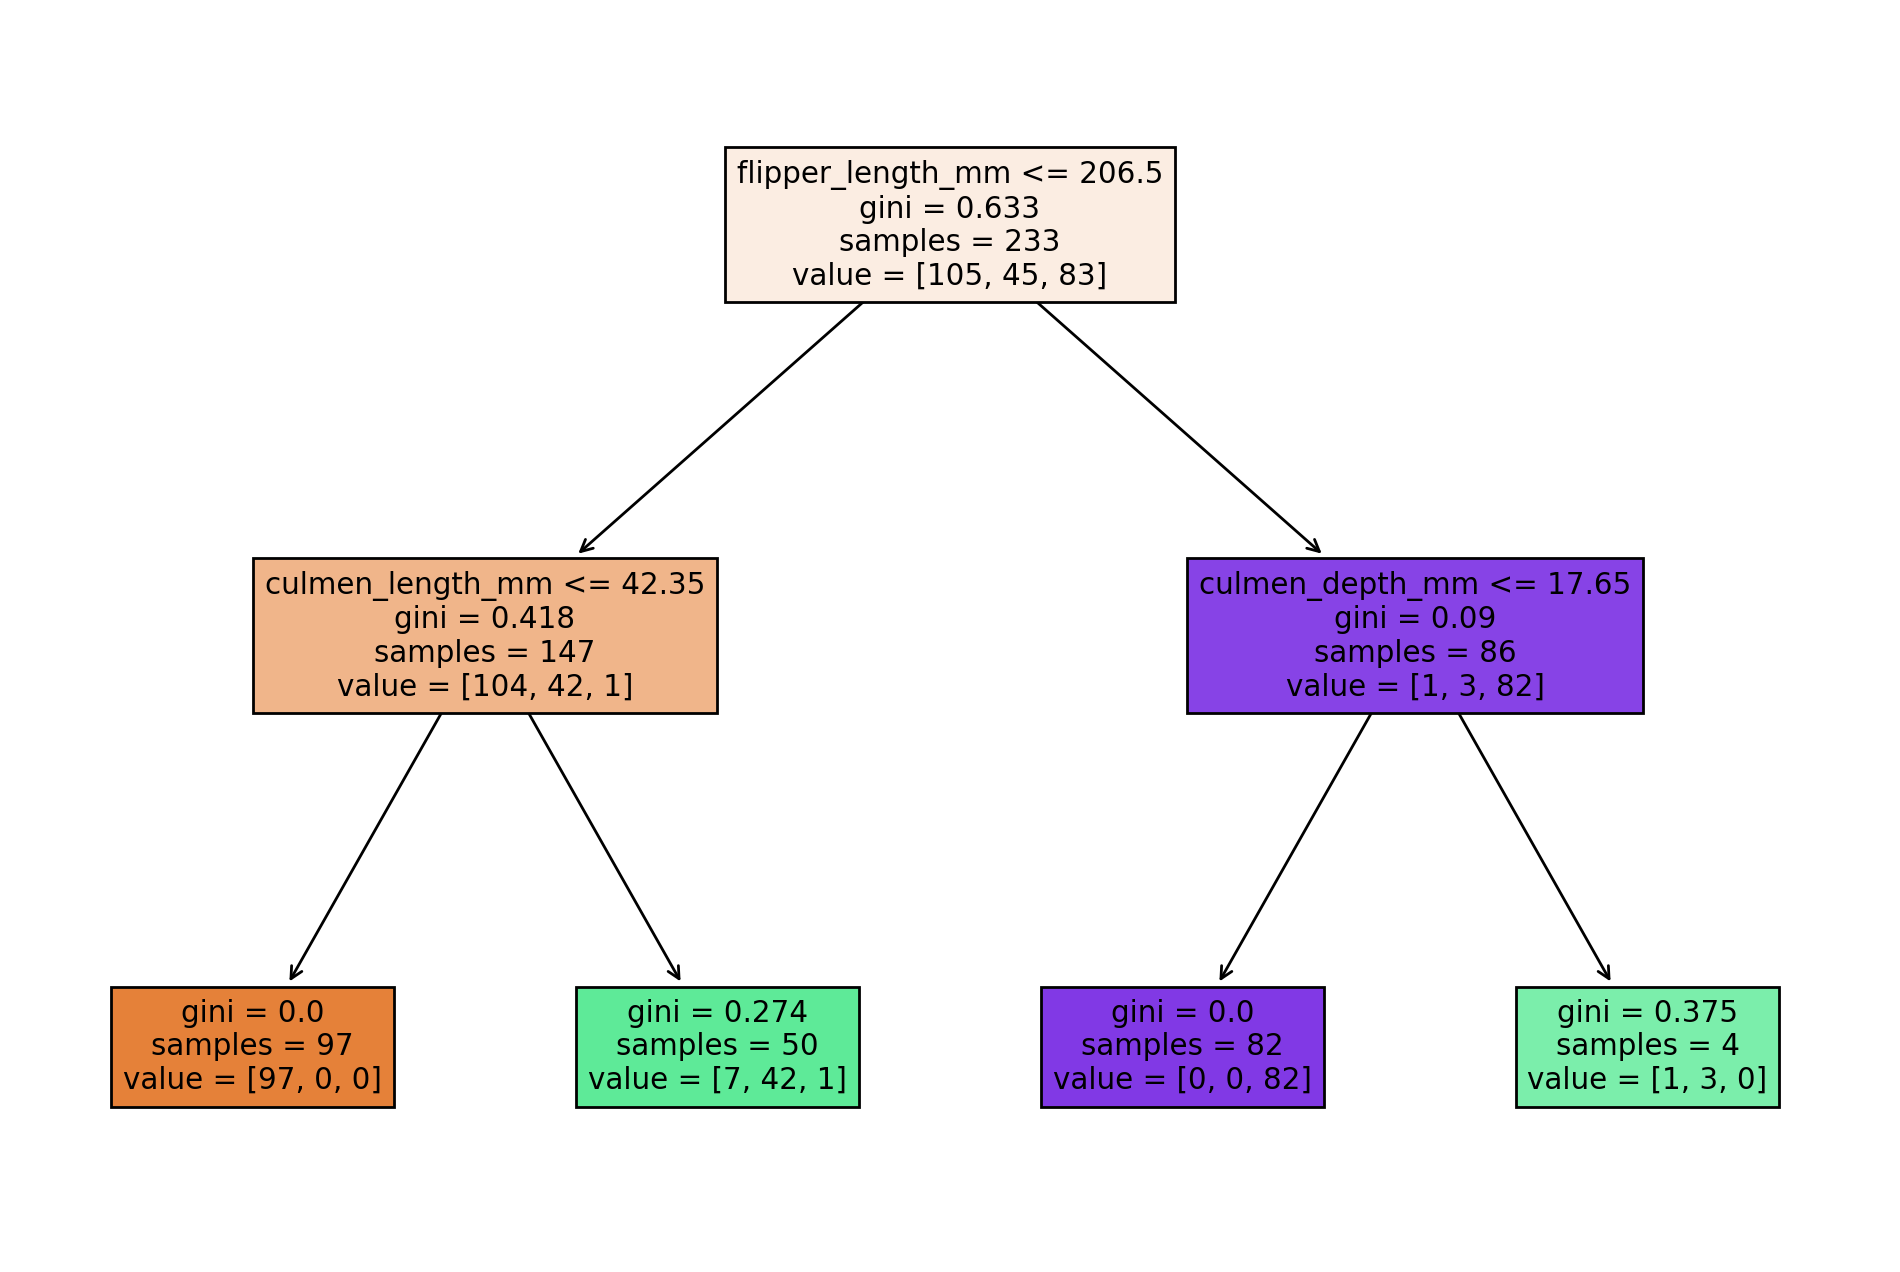

In [86]:
report_model(pruned_tree)

In [88]:
# help(DecisionTreeClassifier)

In [90]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)

In [91]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





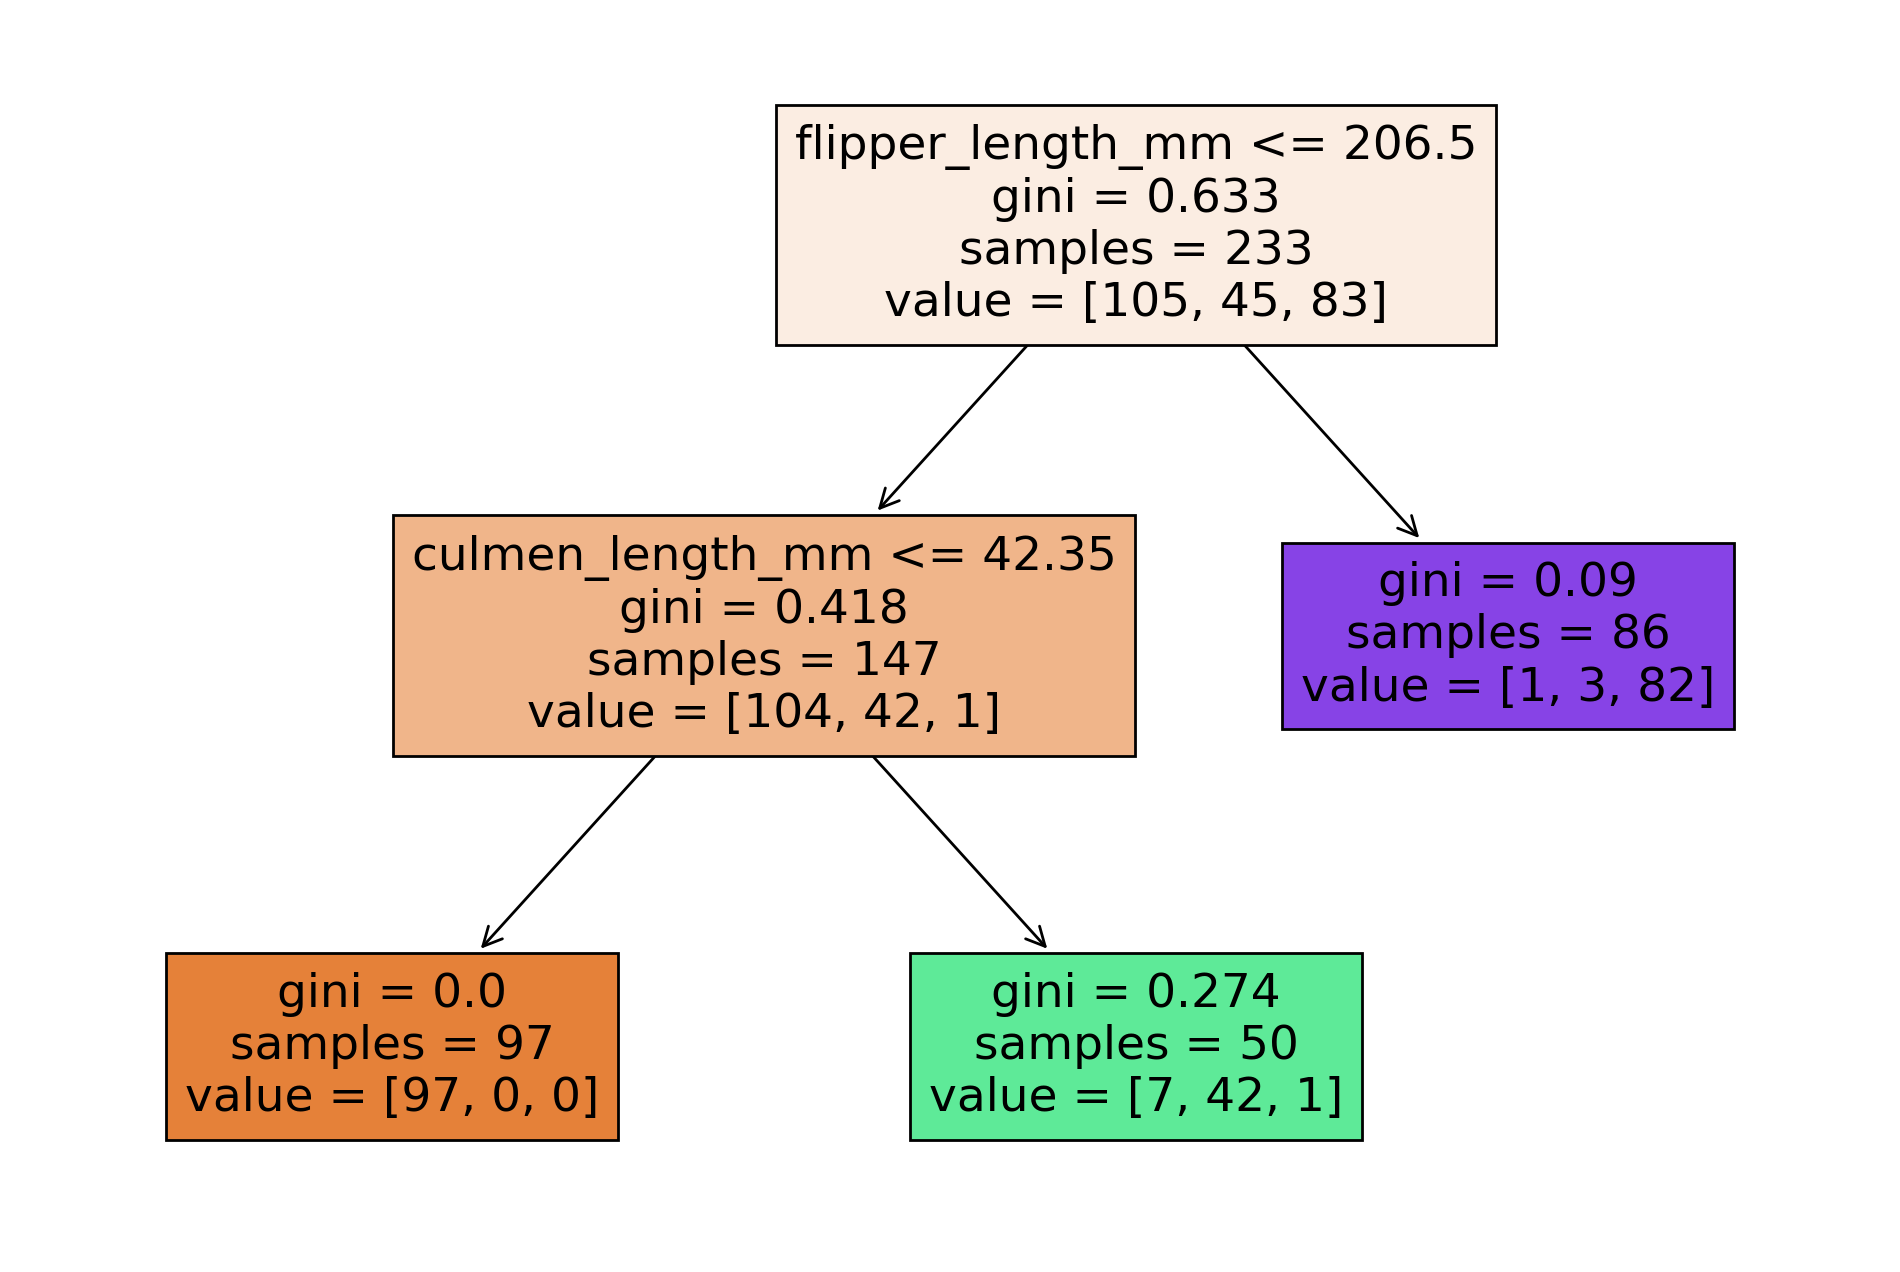

In [92]:
report_model(max_leaf_tree)

## Criterion base on the entropy

In [93]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')

In [94]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101





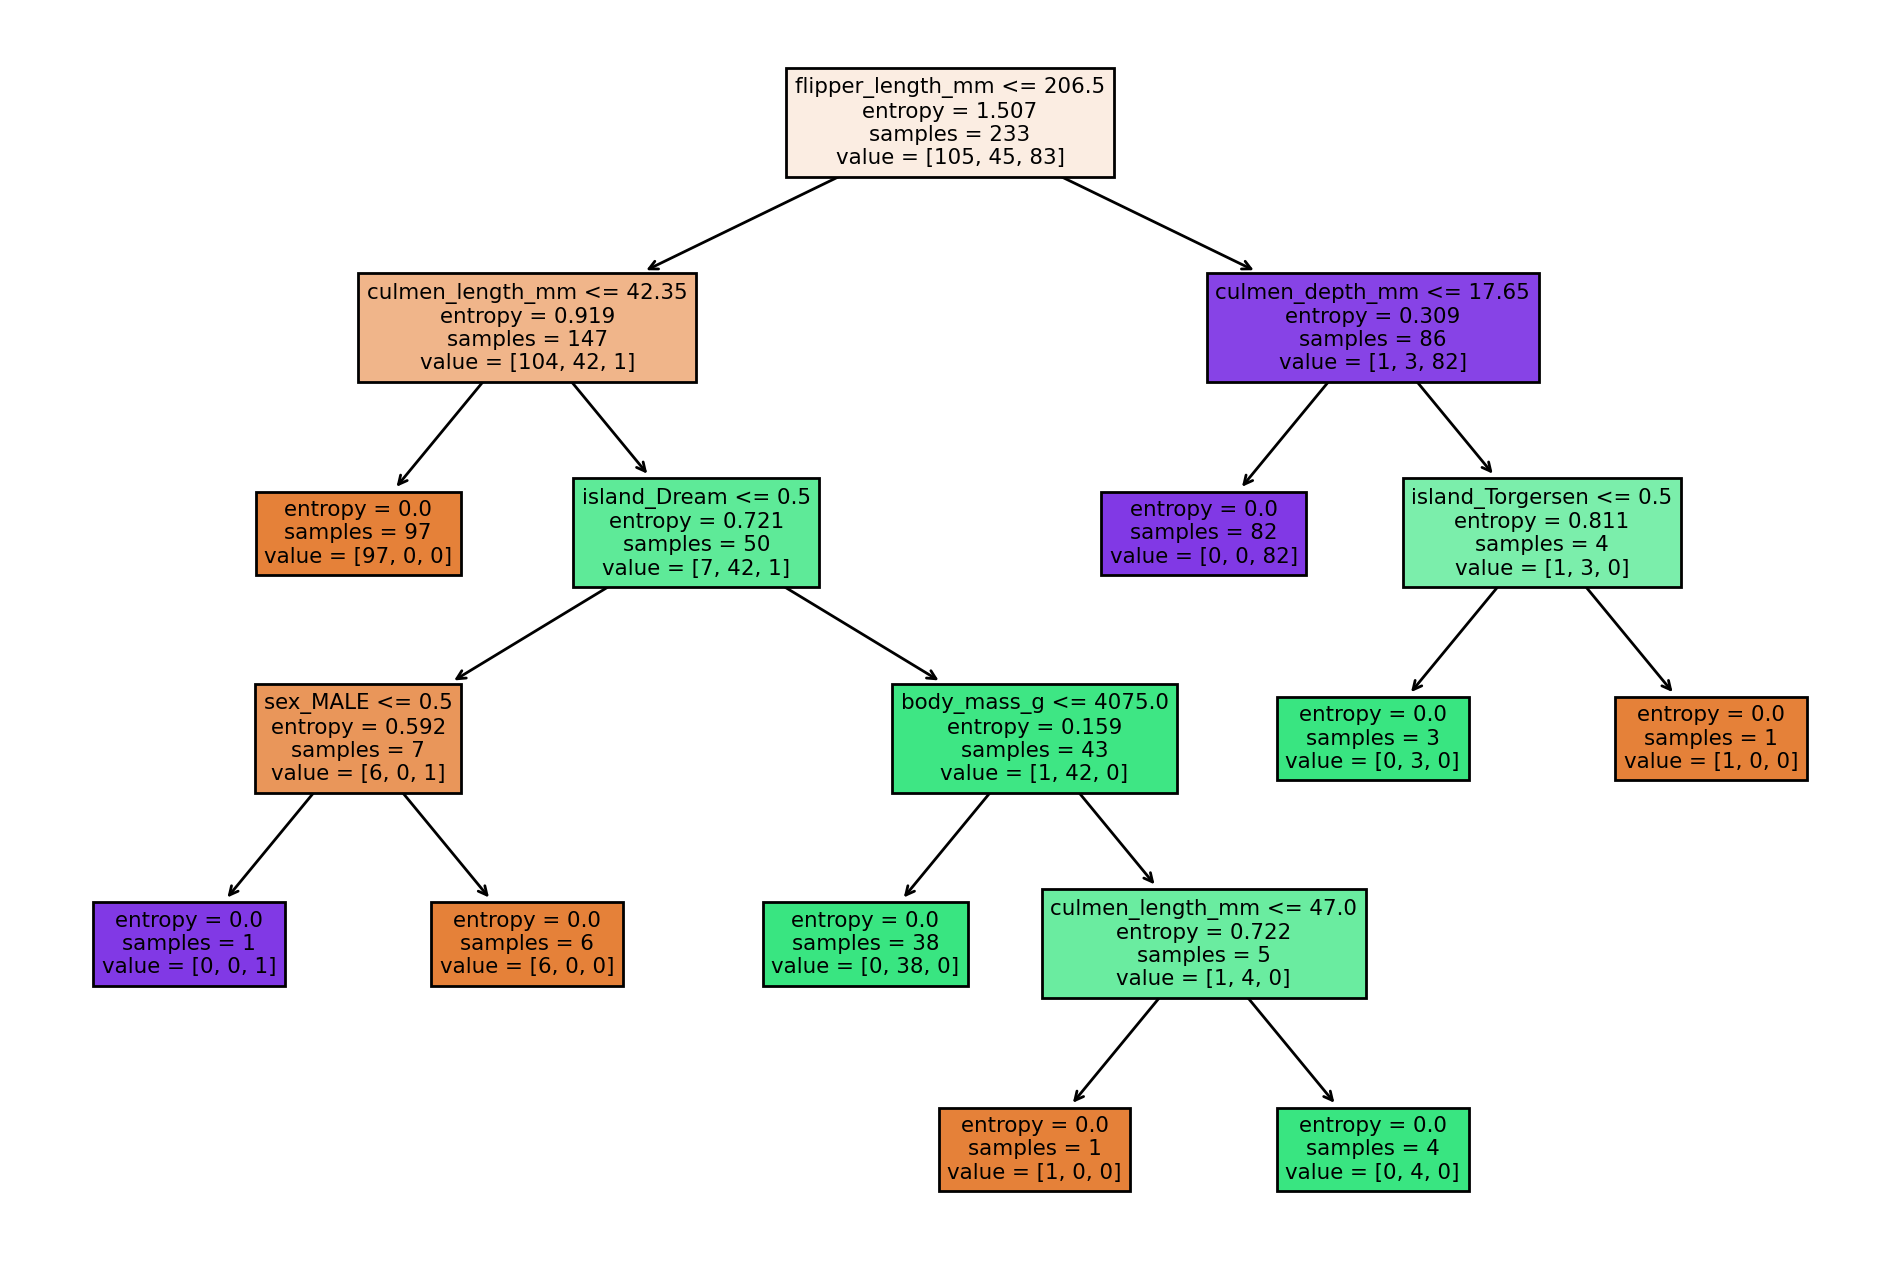

In [95]:
report_model(entropy_tree)